In [8]:
import pandas as pd

ratings = pd.read_csv('ml-1m/ratings.dat', delimiter='::', engine='python', names=['userId', 'movieId', 'rating', 'timestamp'])
users = pd.read_csv('ml-1m/users.dat', delimiter='::', engine='python', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])
movies = pd.read_csv('ml-1m/movies.dat', delimiter='::', engine='python', names=['movieId', 'title', 'genres'], encoding='ISO-8859-1')

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Ratings

<Axes: ylabel='Frequency'>

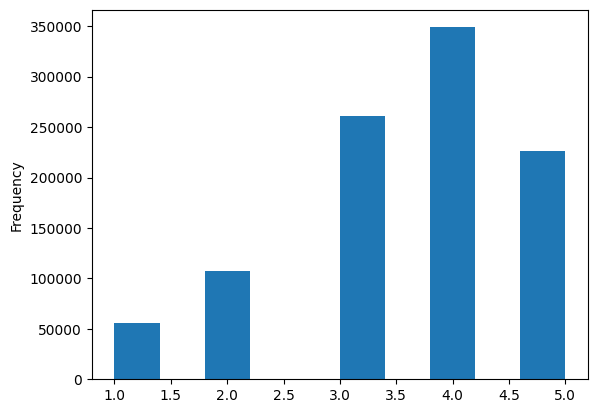

In [14]:
import matplotlib

ratings["rating"].plot.hist()

In [16]:
ratings["userId"].value_counts()

userId
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
708       20
703       20
665       20
2160      20
4749      20
Name: count, Length: 6040, dtype: int64

In [17]:
ratings["movieId"].value_counts()

movieId
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
872        1
2703       1
2845       1
3607       1
2909       1
Name: count, Length: 3706, dtype: int64

## Users

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [19]:
users["gender"].value_counts()

gender
M    4331
F    1709
Name: count, dtype: int64

<Axes: >

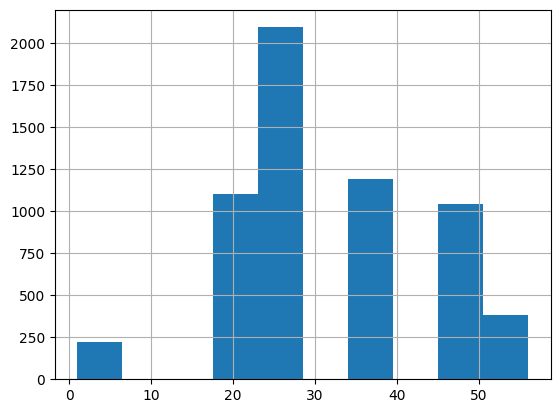

In [20]:
users["age"].hist()

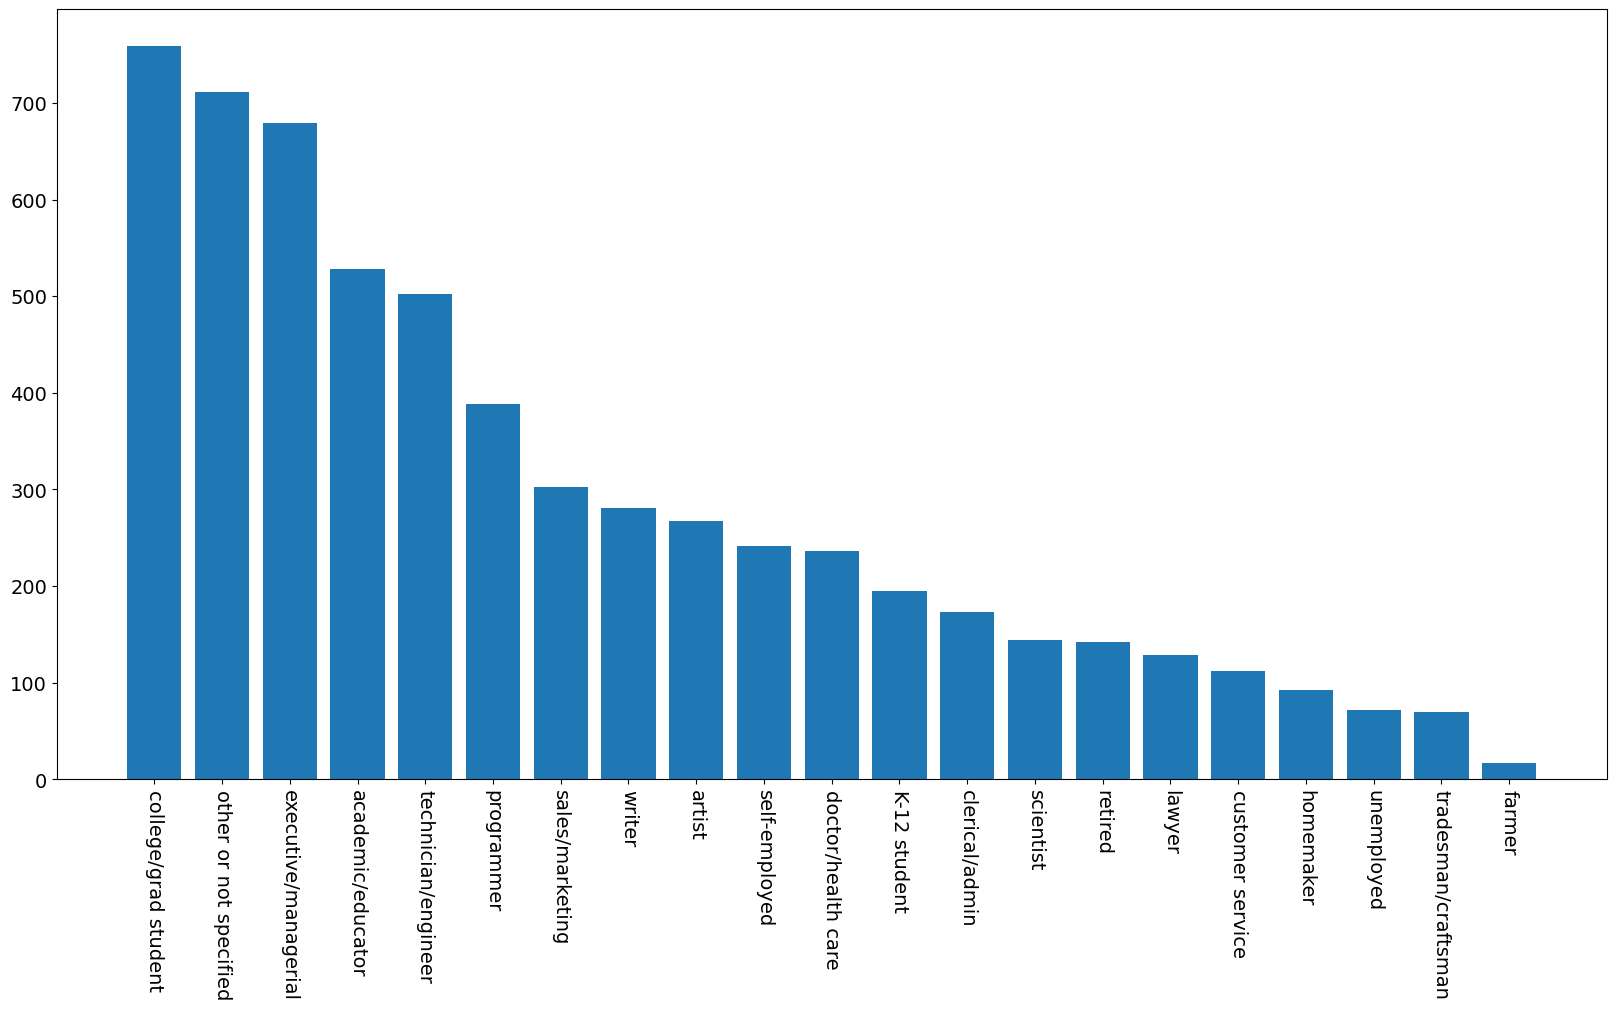

In [26]:
from matplotlib import pyplot as plt


occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = users["occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}


matplotlib.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=-90)
plt.show()

## Movies

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [28]:
movies["num_genres"] = movies["genres"].apply(lambda x: len(x.split('|')))
movies["num_genres"].value_counts()

num_genres
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: count, dtype: int64

hau het cac bo phim deu thuoc 1 the loai, duy nhat 1 bo phim chua 6 the loai cung luc

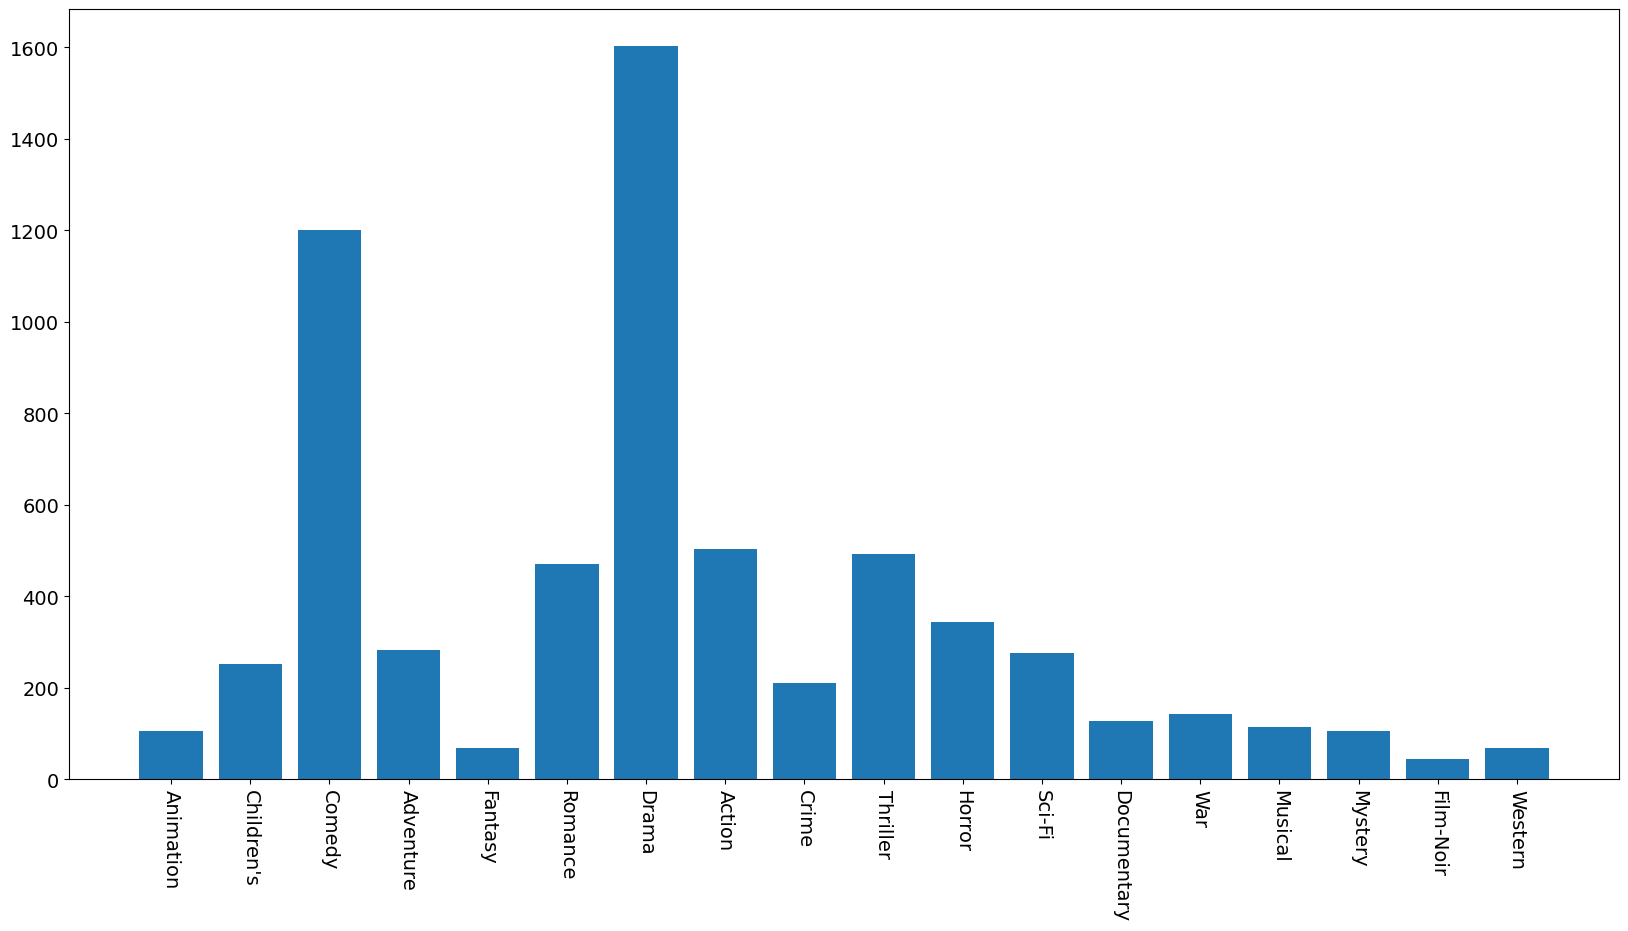

In [30]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies["genres"]:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1
        
plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=-90)
plt.show();